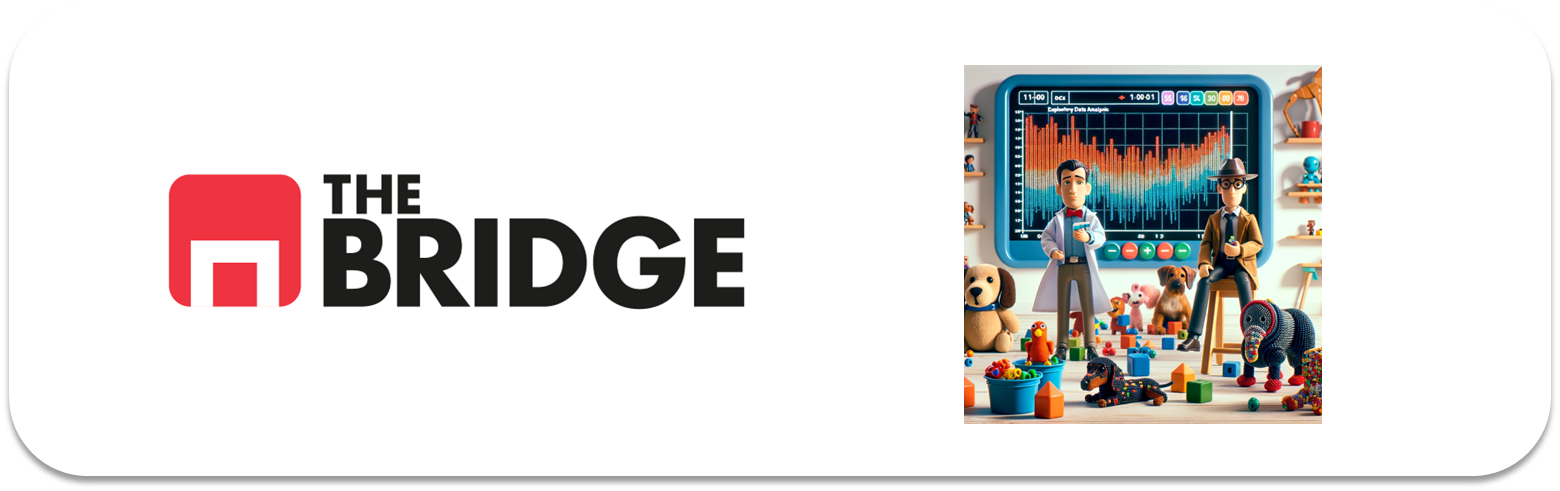

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_combined_graphs, pinta_distribucion_categoricas, plot_categorical_relationship_fin,\
      plot_grouped_boxplots,plot_grouped_histograms, grafico_dispersion_con_correlacion, plot_categorical_numerical_relationship, bubble_plot
from scipy.stats import pearsonr, chi2_contingency, mannwhitneyu,f_oneway

## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [7]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [8]:
df_titanic.drop(columns=['deck','survived','pclass','embarked'], inplace=True)
df_titanic

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,Second,man,True,Southampton,no,True
887,female,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True
888,female,NaN,1,2,23.4500,Third,woman,False,Southampton,no,False
889,male,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [11]:
df_titanic['family_members'] = df_titanic['sibsp'] + df_titanic['parch']
df_titanic.drop(columns=['sibsp','parch'], inplace=True)
df_titanic

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,NaN,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [12]:
df_titanic['embark_town'].fillna(df_titanic['embark_town'].mode()[0], inplace=True)

### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [14]:
es_woman = df_titanic.who == 'woman'
es_child = df_titanic.who == 'child'
es_man = df_titanic.who == 'man'

media_woman = df_titanic.loc[es_woman, 'age'].mean()
media_child = df_titanic.loc[es_child, 'age'].mean()
media_man = df_titanic.loc[es_man, 'age'].mean()

es_age_nulo = df_titanic.age.isna()

df_titanic.loc[es_woman & es_age_nulo, 'age'] = media_woman
df_titanic.loc[es_child & es_age_nulo, 'age'] = media_child
df_titanic.loc[es_man & es_age_nulo, 'age'] = media_man

In [15]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             891 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

In [31]:
# 1.6.1 En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

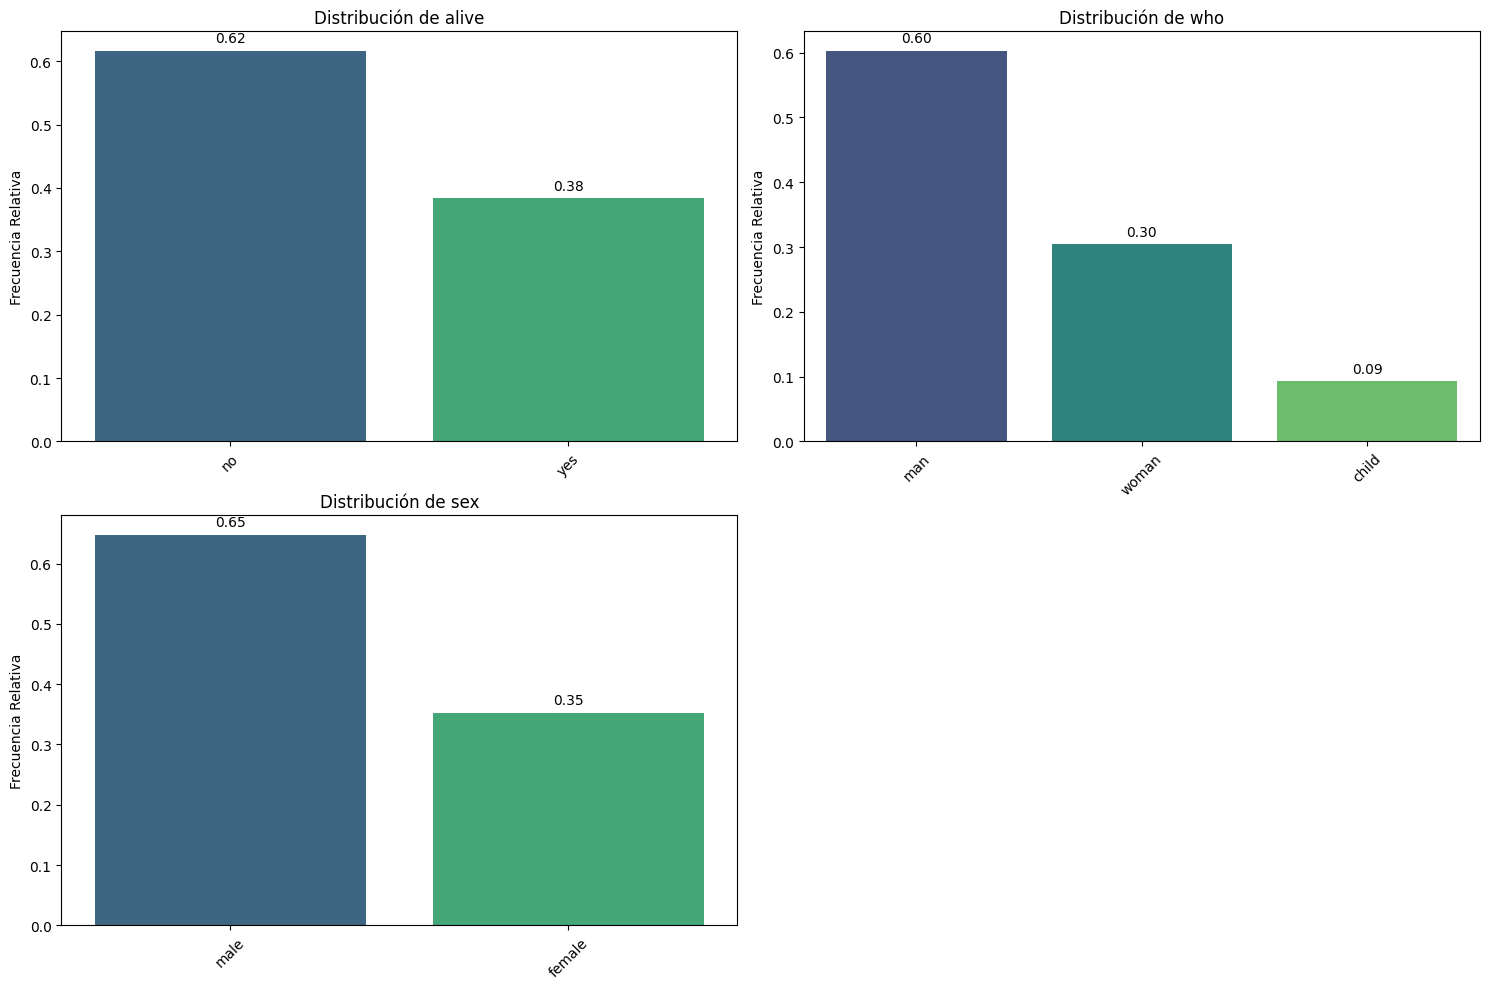

In [17]:
pinta_distribucion_categoricas(df_titanic,["alive","who",'sex'], relativa= True, mostrar_valores= True)

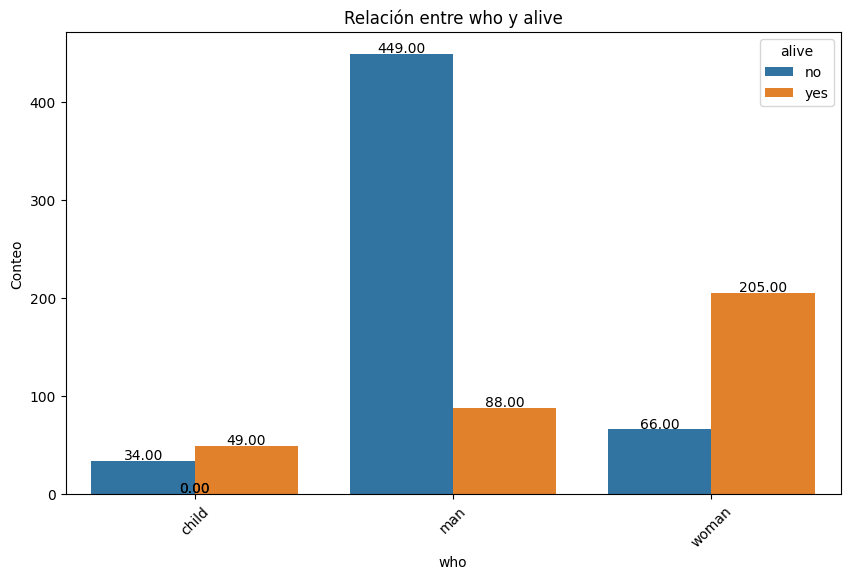

In [19]:
plot_categorical_relationship_fin(df_titanic, 'who',"alive", relative_freq= False, size_group= 4, show_values= True)

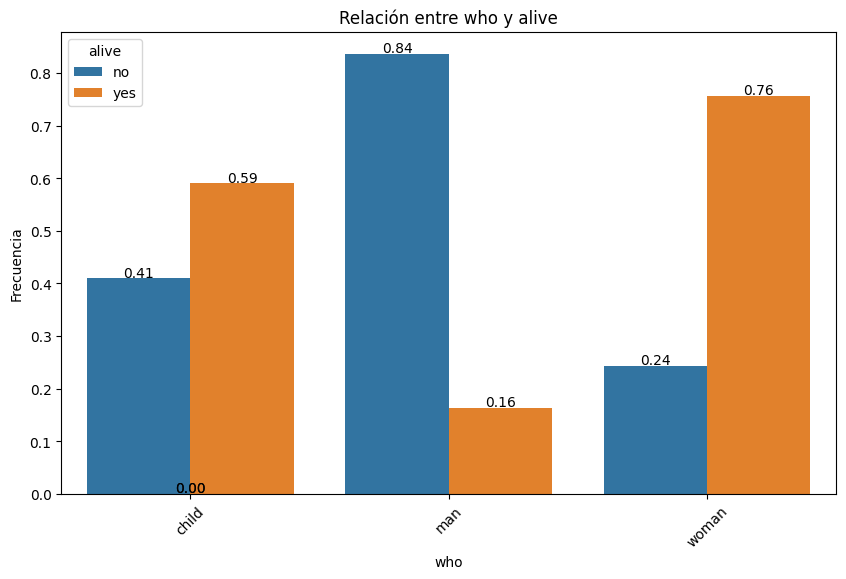

In [20]:
plot_categorical_relationship_fin(df_titanic, 'who',"alive", relative_freq= True, size_group= 4, show_values= True)

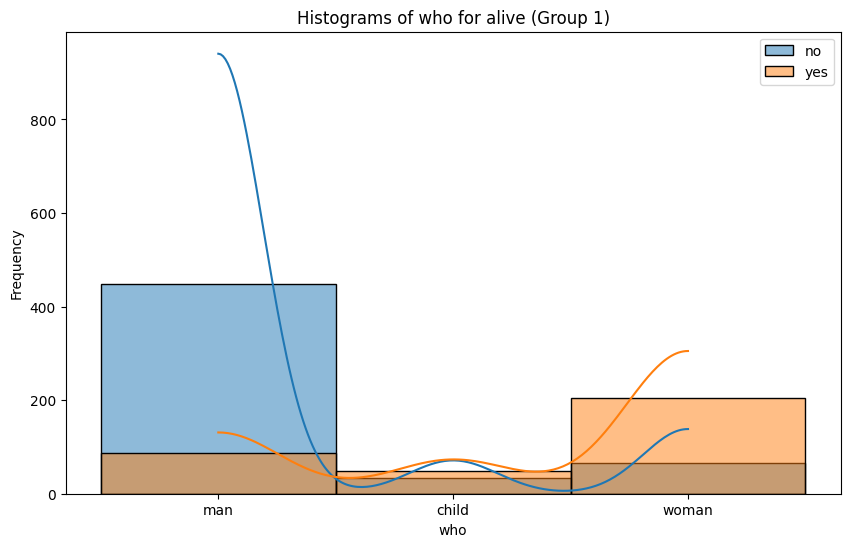

In [35]:
plot_grouped_histograms(df_titanic, 'alive', 'who', group_size= 2)

In [23]:
tabla_contingencia = pd.crosstab(df_titanic['who'], df_titanic['alive'])
tabla_contingencia

alive,no,yes
who,,
child,34,49
man,449,88
woman,66,205


In [27]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 283.923050324233
P-Value: 2.2227620817798914e-62
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 51.14141414  31.85858586]
 [330.87878788 206.12121212]
 [166.97979798 104.02020202]]


*El p-value es bajo, lo que nos indica que podemos rechazar la hipótesis nula de independencia con un alto grado de confianza, y reafirmar que hay una relación entre las variables who y alive, o lo que es lo mismo, decir que no fue lo mismo sobrevivir a la catástrofe del Titanic si eras niño, mujer u hombre*

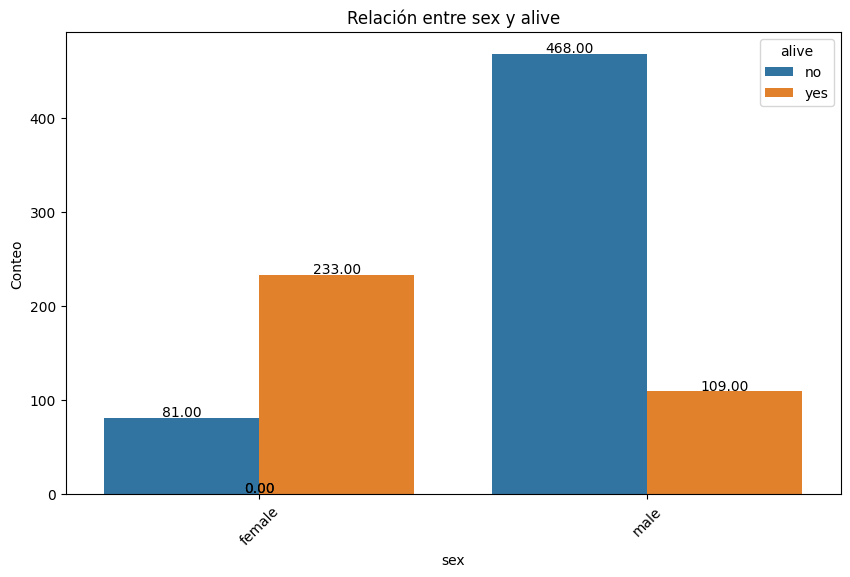

In [21]:
plot_categorical_relationship_fin(df_titanic, 'sex',"alive", relative_freq= False, size_group= 4, show_values= True)

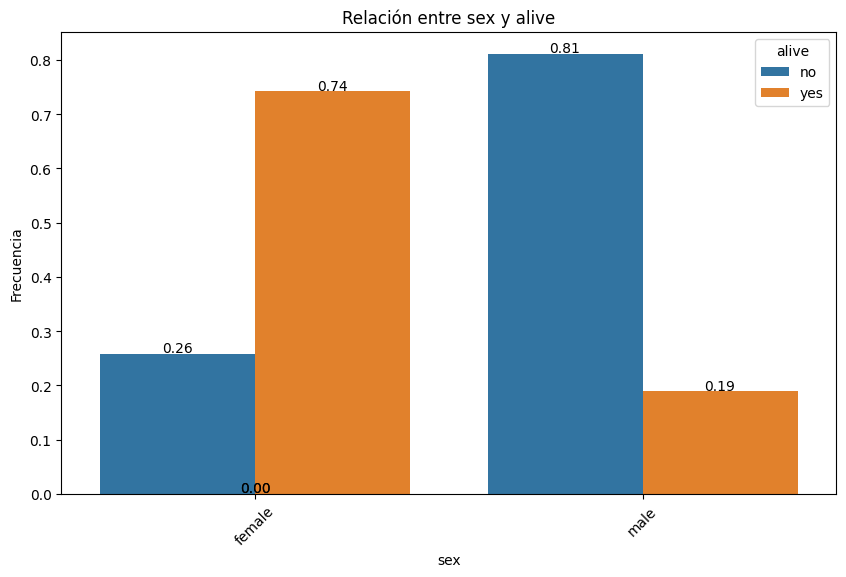

In [22]:
plot_categorical_relationship_fin(df_titanic, 'sex',"alive", relative_freq= True, size_group= 4, show_values= True)

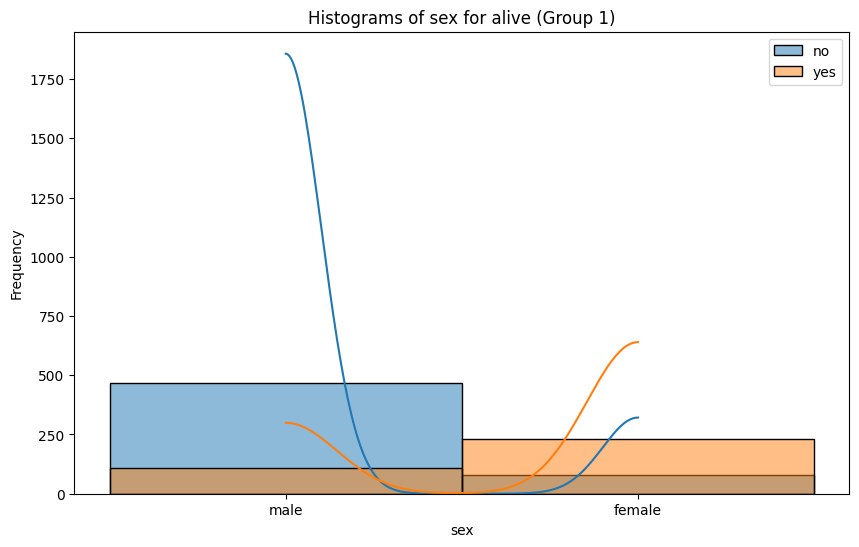

In [36]:
plot_grouped_histograms(df_titanic, 'alive', 'sex', group_size= 2)

In [29]:
tabla_contingencia = pd.crosstab(df_titanic['sex'], df_titanic['alive'])
tabla_contingencia

alive,no,yes
sex,,
female,81,233
male,468,109


In [30]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 260.71702016732104
P-Value: 1.1973570627755645e-58
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[193.47474747 120.52525253]
 [355.52525253 221.47474747]]


*El p-value es bajo, lo que nos indica que podemos rechazar la hipótesis nula de independencia con un alto grado de confianza, y reafirmar que hay una relación entre las variables sex y alive, o lo que es lo mismo, decir que no fue lo mismo sobrevivir a la catástrofe del Titanic si eras mujer u hombre*

In [32]:
#1.6.2 En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

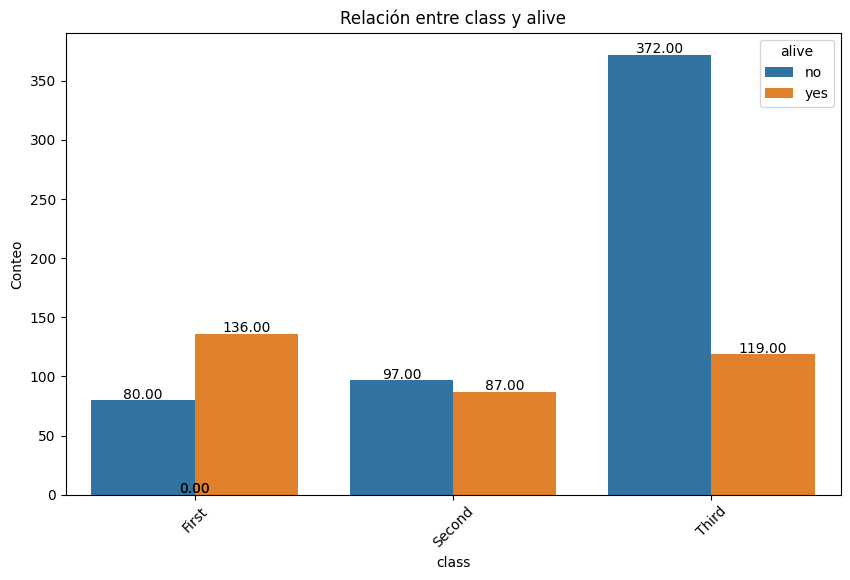

In [37]:
plot_categorical_relationship_fin(df_titanic, 'class',"alive", relative_freq= False, size_group= 4, show_values= True)

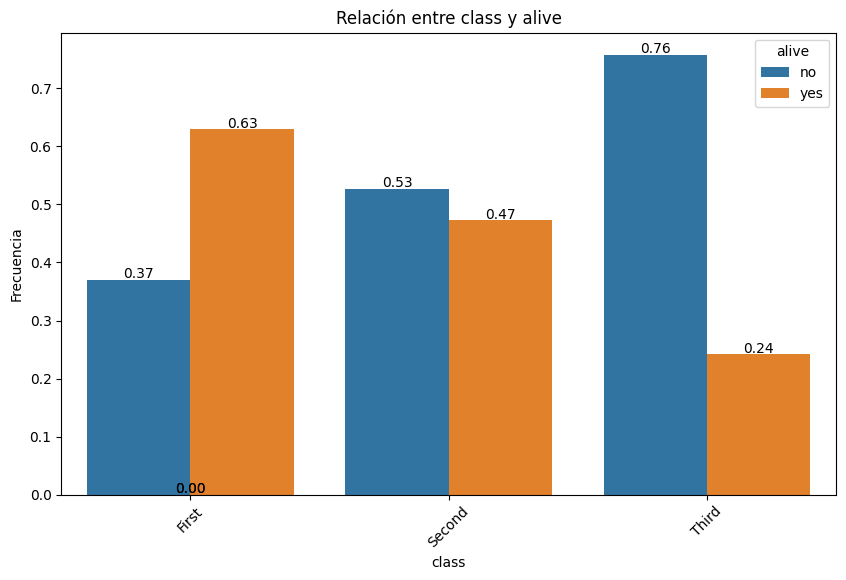

In [38]:
plot_categorical_relationship_fin(df_titanic, 'class',"alive", relative_freq= True, size_group= 4, show_values= True)

In [39]:
tabla_contingencia = pd.crosstab(df_titanic['class'], df_titanic['alive'])
tabla_contingencia

alive,no,yes
class,,
First,80,136
Second,97,87
Third,372,119


In [40]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


*El p-value es bajo, lo que nos indica que podemos rechazar la hipótesis nula de independencia con un alto grado de confianza, y reafirmar que hay una relación entre las variables class y alive, o lo que es lo mismo, decir que no fue lo mismo sobrevivir a la catástrofe del Titanic si estabas en 1ª, 2ª o 3ª clase*

In [ ]:
#1.6.3 ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

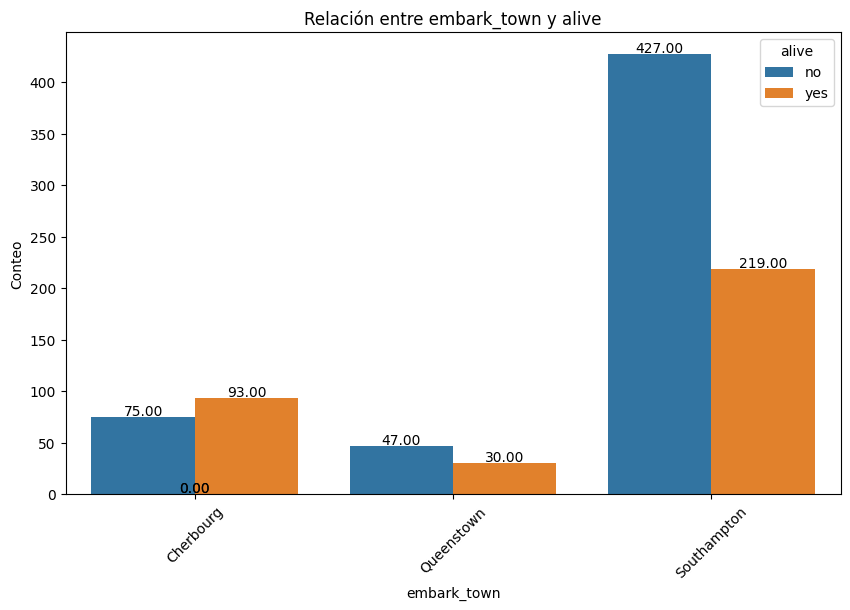

In [41]:
plot_categorical_relationship_fin(df_titanic, 'embark_town',"alive", relative_freq= False, size_group= 4, show_values= True)

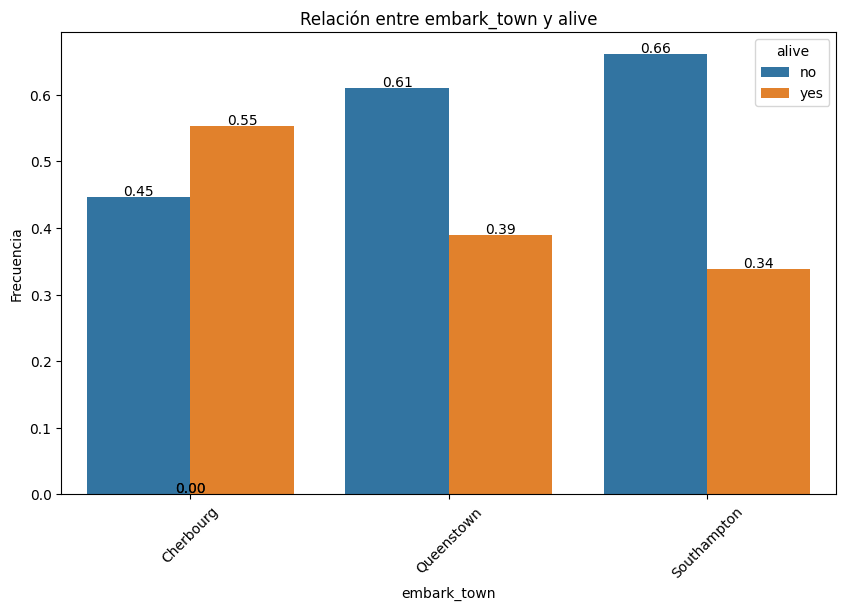

In [42]:
plot_categorical_relationship_fin(df_titanic, 'embark_town',"alive", relative_freq= True, size_group= 4, show_values= True)

In [43]:
tabla_contingencia = pd.crosstab(df_titanic['embark_town'], df_titanic['alive'])
tabla_contingencia

alive,no,yes
embark_town,,
Cherbourg,75,93
Queenstown,47,30
Southampton,427,219


In [44]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 25.964452881874784
P-Value: 2.3008626481449577e-06
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[103.51515152  64.48484848]
 [ 47.44444444  29.55555556]
 [398.04040404 247.95959596]]


*El p-value es bajo, lo que nos indica que podemos rechazar la hipótesis nula de independencia con un alto grado de confianza, y reafirmar que hay una relación entre las variables embark_town y alive, o lo que es lo mismo, decir que no fue lo mismo sobrevivir a la catástrofe del Titanic si embarcabas sobretodo en Cherbourg, o en Queenstown o Southampton*

In [ ]:
#1.6.4 ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

In [64]:
df_titanic['fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

(2,)


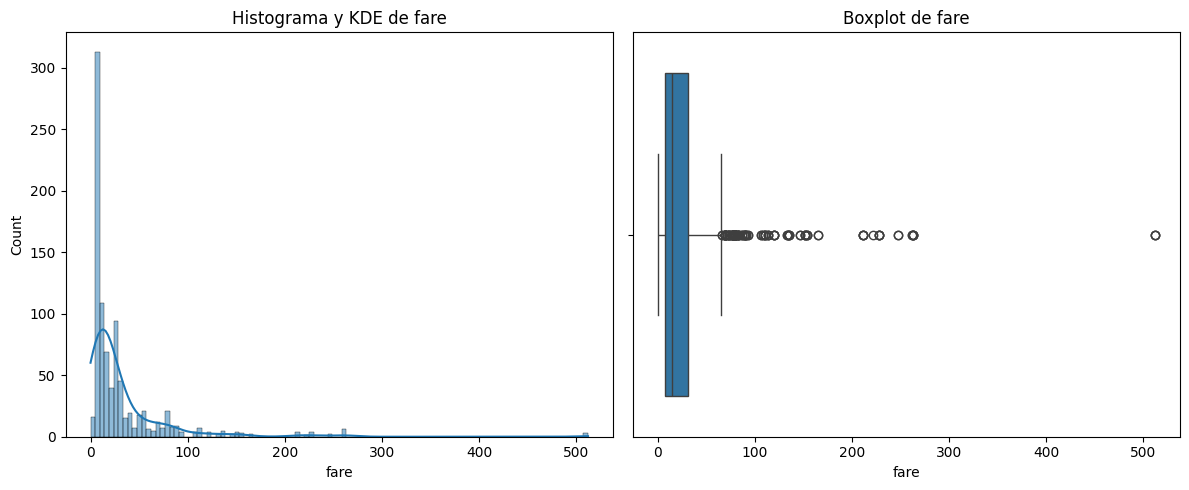

In [53]:
plot_combined_graphs(df_titanic,["fare"])

In [57]:
tabla_contingencia = pd.crosstab(df_titanic['fare'], df_titanic['alive'])
tabla_contingencia

alive,no,yes
fare,,
0.0000,14,1
4.0125,1,0
5.0000,1,0
6.2375,1,0
6.4375,1,0
...,...,...
227.5250,1,3
247.5208,1,1
262.3750,0,2


In [58]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 425.8083805791106
P-Value: 1.1647635739939964e-11
Grados de Libertad: 247
Tabla de Frecuencias Esperadas:
 [[ 9.24242424  5.75757576]
 [ 0.61616162  0.38383838]
 [ 0.61616162  0.38383838]
 [ 0.61616162  0.38383838]
 [ 0.61616162  0.38383838]
 [ 0.61616162  0.38383838]
 [ 1.23232323  0.76767677]
 [ 1.23232323  0.76767677]
 [ 0.61616162  0.38383838]
 [ 0.61616162  0.38383838]
 [ 1.23232323  0.76767677]
 [ 0.61616162  0.38383838]
 [ 4.31313131  2.68686869]
 [ 1.23232323  0.76767677]
 [ 2.46464646  1.53535354]
 [ 0.61616162  0.38383838]
 [ 7.39393939  4.60606061]
 [ 9.24242424  5.75757576]
 [ 8.01010101  4.98989899]
 [ 0.61616162  0.38383838]
 [ 1.84848485  1.15151515]
 [ 0.61616162  0.38383838]
 [ 2.46464646  1.53535354]
 [ 0.61616162  0.38383838]
 [ 2.46464646  1.53535354]
 [ 0.61616162  0.38383838]
 [ 0.61616162  0.38383838]
 [ 2.46464646  1.53535354]
 [ 1.23232323  0.76767677]
 [ 0.61616162  0.38383838]
 [20.94949495 13.05050505]
 [ 9.85858586  6.14141414]
 [ 0.6161

*El p-value es bajo, lo que nos indica que podemos rechazar la hipótesis nula de independencia con un alto grado de confianza, y reafirmar que hay una relación entre las variables fare y alive, o lo que es lo mismo, decir que no fue lo mismo sobrevivir o no a la catástrofe del Titanic dependió del precio que se pagó por el billete*

In [ ]:
#1.6.5 Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

In [61]:
df_titanic.loc[df_titanic.fare == 0 ]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
179,male,36.000000,0.0,Third,man,True,Southampton,no,True,0
263,male,40.000000,0.0,First,man,True,Southampton,no,True,0
271,male,25.000000,0.0,Third,man,True,Southampton,yes,True,0
277,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
302,male,19.000000,0.0,Third,man,True,Southampton,no,True,0
413,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
466,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
481,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
597,male,49.000000,0.0,Third,man,True,Southampton,no,True,0
633,male,33.173123,0.0,First,man,True,Southampton,no,True,0


*Seguramente sería tripulación*

In [60]:
df_titanic.loc[df_titanic.fare > 500 ]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
258,female,35.0,512.3292,First,woman,False,Cherbourg,yes,True,0
679,male,36.0,512.3292,First,man,True,Cherbourg,yes,False,1
737,male,35.0,512.3292,First,man,True,Cherbourg,yes,True,0


*Las 3 personas que pagaron los billetes mas caros se salvaron*

In [ ]:
#1.6.6 Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

In [98]:
df_titanic.fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [99]:
bins = [0, 8, 15, 32, float('inf')]
labels = ['Gratis', 'Barato', 'Medio', 'Caro']

df_titanic['cat_fare'] = pd.cut(df_titanic['fare'], bins=bins, labels=labels)

In [100]:
columnas = ["alive","cat_fare","embark_town"] 
col_directora = "alive"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[col_2,col_1]] 

Respuesta no:


c:\Users\julio\Bootcamp_DS\ONLINE_DS_THEBRIDGE_juliog\Notebooks_Bootcamp_Data_Science\Sprint_07\Ejercicios\Ud2\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


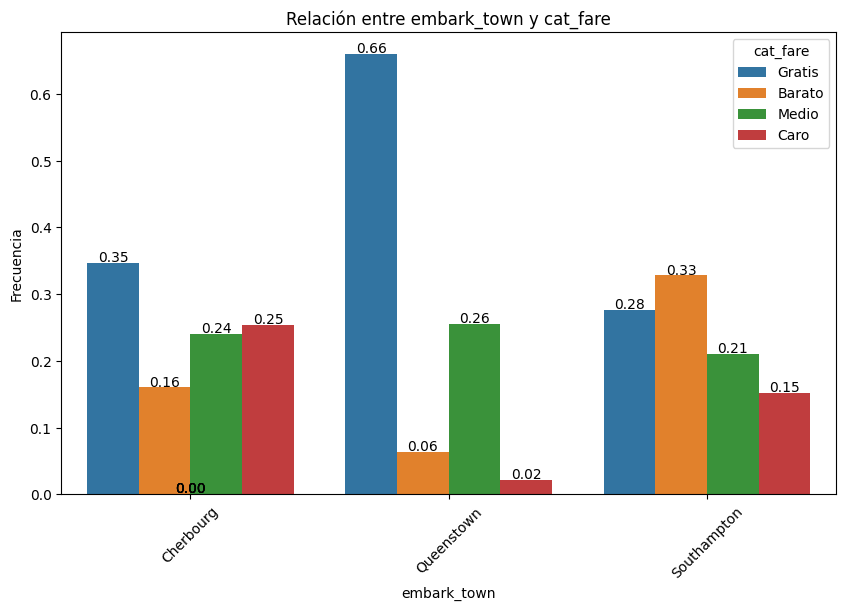

Respuesta yes:


c:\Users\julio\Bootcamp_DS\ONLINE_DS_THEBRIDGE_juliog\Notebooks_Bootcamp_Data_Science\Sprint_07\Ejercicios\Ud2\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


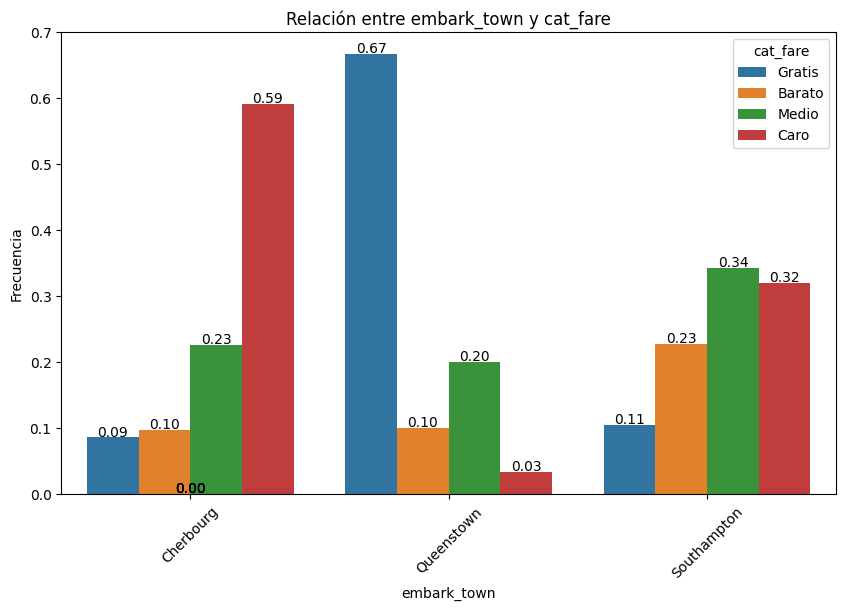

In [101]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= True, show_values= True, size_group= 4)

In [ ]:
#1.6.7 Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

In [103]:
df_titanic.age.describe()

count    891.000000
mean      30.319458
std       13.063839
min        0.420000
25%       22.000000
50%       32.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64

In [105]:
bins = [20, 40, 80,float('inf')]
labels = ['Menores de 20', 'Menores de 40', 'Maypres de 40']

df_titanic['cat_age'] = pd.cut(df_titanic['age'], bins=bins, labels=labels)

In [106]:
columnas = ["alive","cat_age","class"] 
col_directora = "alive"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[col_2,col_1]] 

Respuesta no:


c:\Users\julio\Bootcamp_DS\ONLINE_DS_THEBRIDGE_juliog\Notebooks_Bootcamp_Data_Science\Sprint_07\Ejercicios\Ud2\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


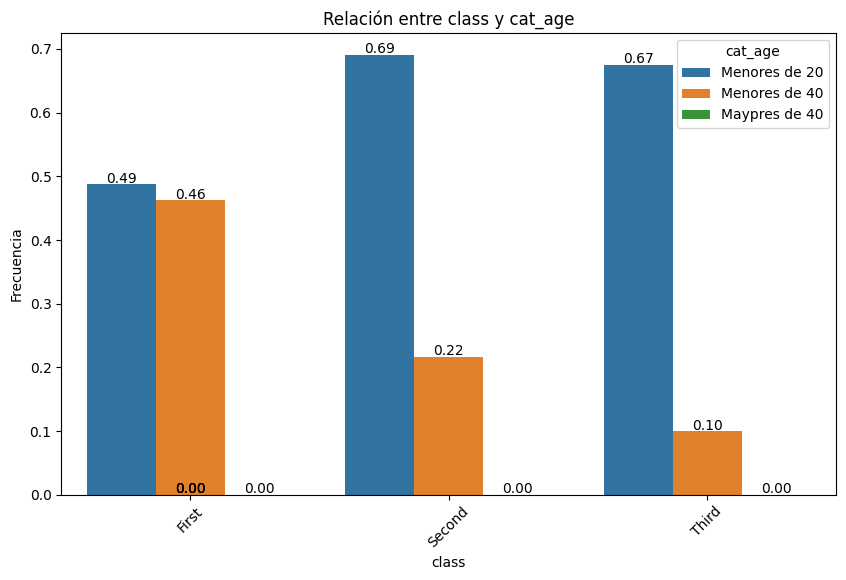

Respuesta yes:


c:\Users\julio\Bootcamp_DS\ONLINE_DS_THEBRIDGE_juliog\Notebooks_Bootcamp_Data_Science\Sprint_07\Ejercicios\Ud2\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


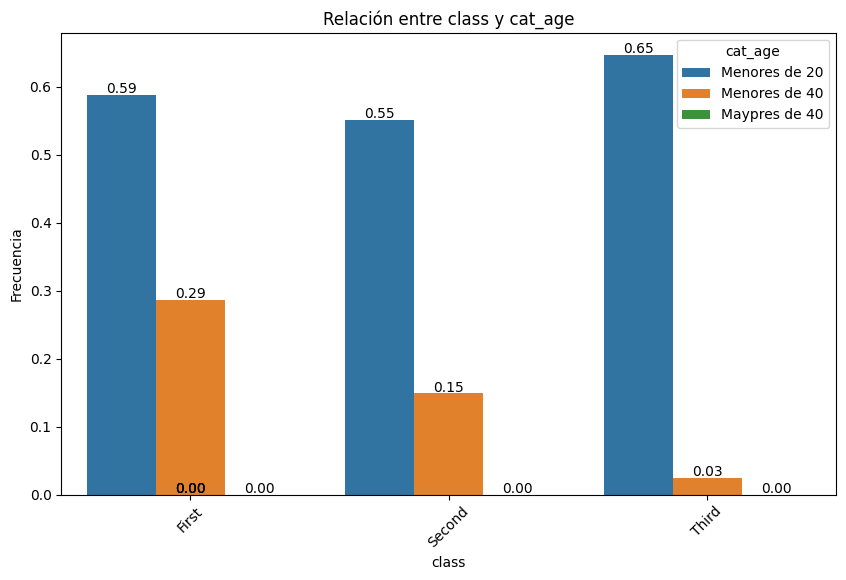

In [107]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= True, show_values= True, size_group= 4)

In [ ]:
#1.6.8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

In [110]:
columnas = ["alive","cat_age","cat_fare"] 
col_directora = "alive"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor,[col_2,col_1]] 

Respuesta no:


c:\Users\julio\Bootcamp_DS\ONLINE_DS_THEBRIDGE_juliog\Notebooks_Bootcamp_Data_Science\Sprint_07\Ejercicios\Ud2\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


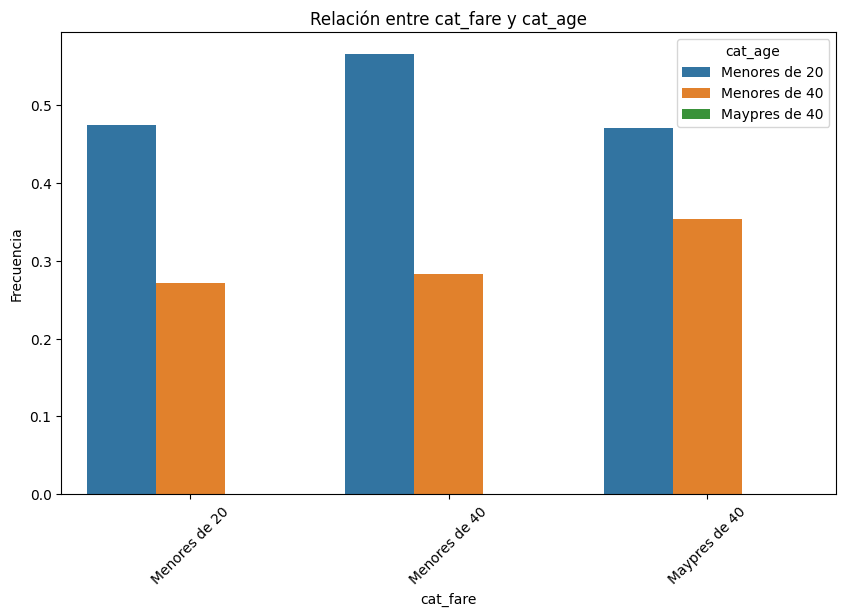

Respuesta yes:


c:\Users\julio\Bootcamp_DS\ONLINE_DS_THEBRIDGE_juliog\Notebooks_Bootcamp_Data_Science\Sprint_07\Ejercicios\Ud2\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


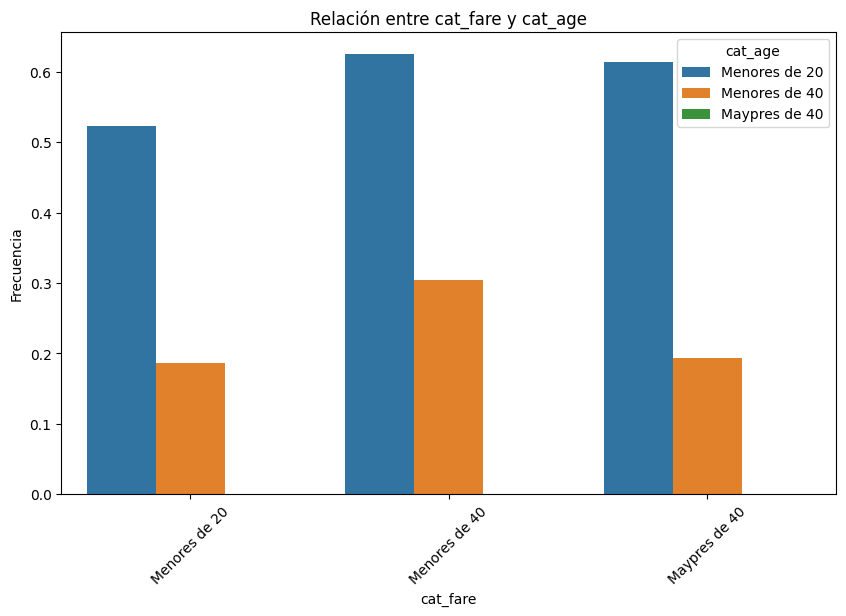

In [111]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= True, show_values= False, size_group= 100)

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [75]:
df_junio = pd.read_csv("./data/dataset_viajes_jun23.csv")
df_junio

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23
...,...,...,...,...,...,...,...,...,...,...,...
595,PamPangea,Bali,Londres,12553,Boeing 737,True,33310.138680,1153,442668.52,Pam_BaLo_10737,Jun23
596,Airnar,Cádiz,París,1447,Airbus A380,False,17229.139600,116,87307.63,Air_CaPa_11380,Jun23
597,Airnar,Los Angeles,Cádiz,9373,Boeing 737,False,23231.917800,731,339943.47,Air_LoCa_10737,Jun23
598,FlyQ,Barcelona,Bali,13058,Boeing 747,True,144766.211200,1070,752212.98,Fly_BaBa_10747,Jun23


In [81]:
viajes_por_compania = df_junio['aircompany'].value_counts()
print(viajes_por_compania)

aircompany
TabarAir      142
MoldaviAir    133
PamPangea     117
FlyQ          108
Airnar        100
Name: count, dtype: int64


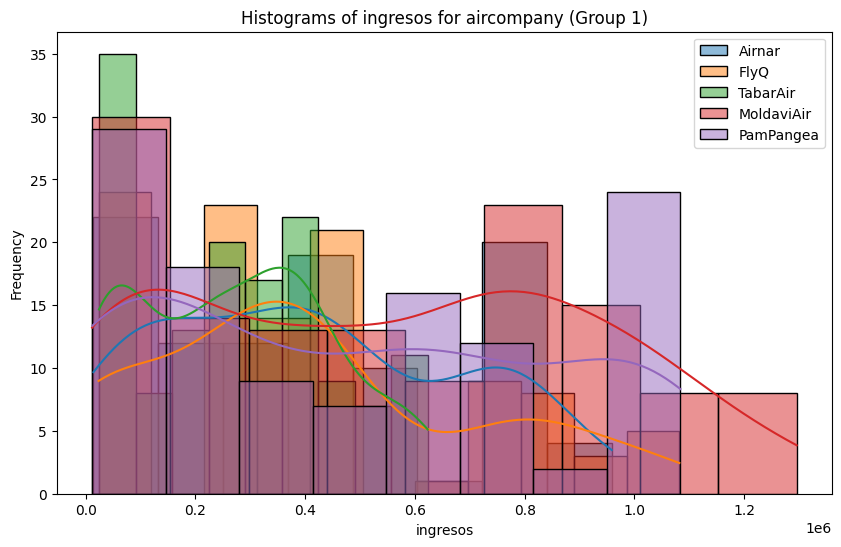

In [84]:
plot_grouped_histograms(df_junio, "aircompany","ingresos", group_size= 5)

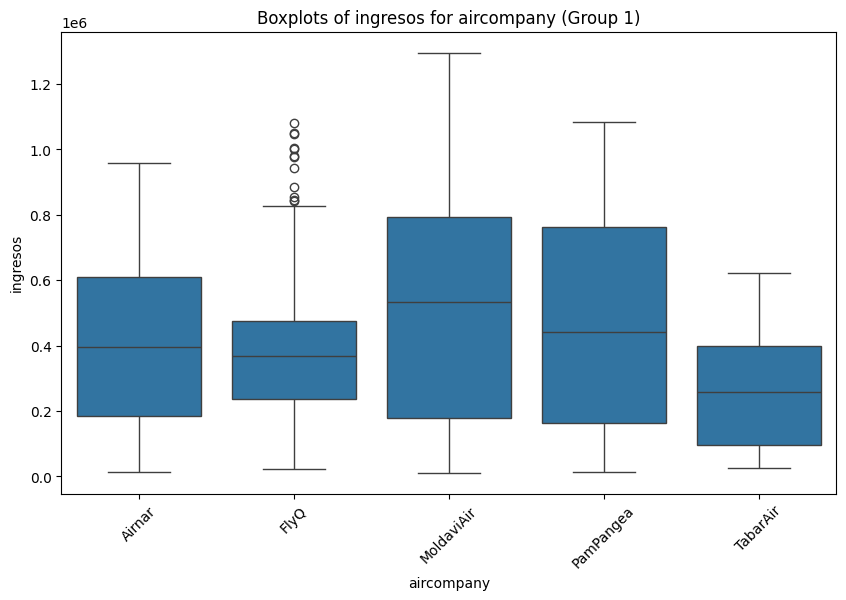

In [86]:
plot_grouped_boxplots(df_junio.sort_values("aircompany"),"aircompany", "ingresos")

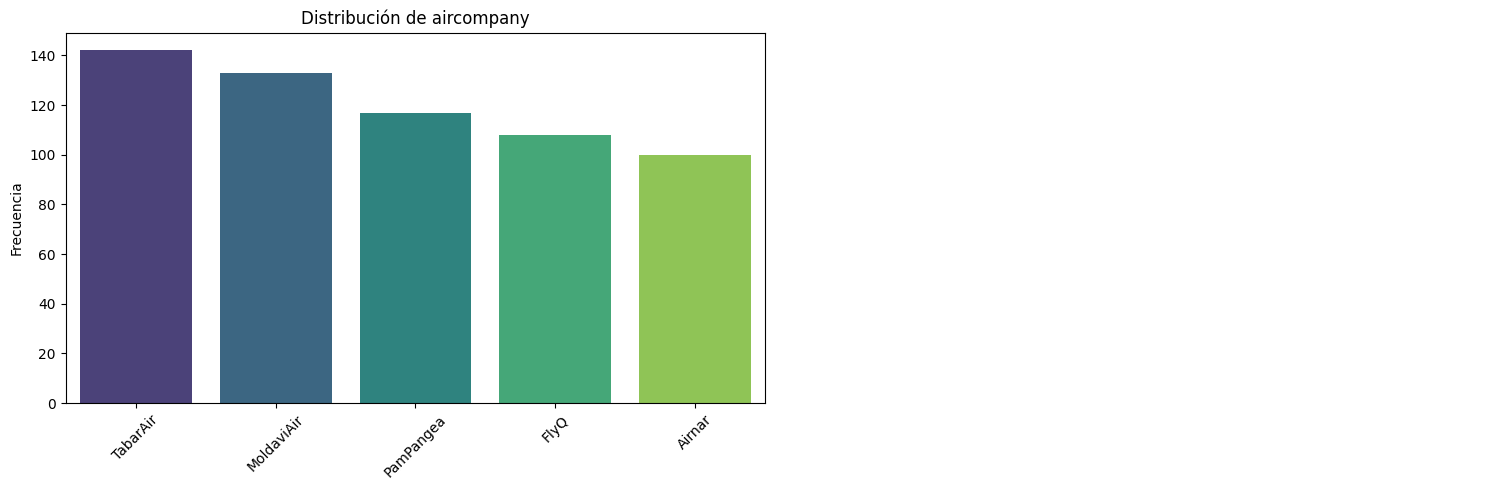

In [87]:
pinta_distribucion_categoricas(df_junio, ["aircompany"])

In [88]:
#ANALISIS DE VARIANZA O ANOVA

grupos = df_junio['aircompany'].unique()  # Obtener los valores únicos de la columna categórica
ing_per_comp = [df_junio[df_junio['aircompany'] == grupo]['ingresos'] for grupo in grupos] # obtenemos los ingresos por compañía y los incluimos en una lista
ing_per_comp

[0       14232.65
 9      110108.07
 17     518685.45
 21     799063.90
 23     432558.22
          ...    
 573    732878.07
 577    754191.00
 580    928050.52
 596     87307.63
 597    339943.47
 Name: ingresos, Length: 100, dtype: float64,
 1       468527.19
 33      273824.24
 36      235350.43
 40       25642.94
 41      417965.59
           ...    
 575     429377.42
 581    1004810.48
 589     398905.47
 590      31227.48
 598     752212.98
 Name: ingresos, Length: 108, dtype: float64,
 2      584789.19
 4      438535.07
 10     111056.67
 12     184079.01
 13      46200.30
          ...    
 572    258737.92
 582    423371.06
 587    404542.35
 593    550268.31
 599    330320.81
 Name: ingresos, Length: 142, dtype: float64,
 3       233342.51
 5       728045.68
 6        13805.52
 11      764998.83
 16      719577.55
           ...    
 578      12372.41
 579     409713.51
 583    1006880.11
 584      70674.57
 585     225493.20
 Name: ingresos, Length: 133, dtype: float64,
 7

In [90]:
#2 Aplicar el estadístico
f_val, p_val = f_oneway(*ing_per_comp) # El operador * (igual que cuando vimos *args hace mil años) 
                                                    # lo que hace es separar todos los elementos de la lista y pasarselos como argumento a la función
print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 15.68687291880937
Valor p: 3.267745855663723e-12


*El p-value obtenido nos dice que rechacemos la hipótesis nula o directora de indepedencia y que existe una relación estadísticamente significativa extrapolable entre los ingresos y la compañia.*

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

In [93]:
columnas = ["ingresos","distancia","consumo_kg"] 
col_directora = "ingresos"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df_junio[col_directora].unique():
    diccionario_multivariante[valor] = df_junio.loc[df_junio[col_directora] == valor,[col_2,col_1]] 

In [ ]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= True, show_values= True, size_group= 4)

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

In [96]:
print(df_junio['distancia'].describe())

count      600.000000
mean      8071.003333
std       5550.244086
min        344.000000
25%       3073.000000
50%       6877.000000
75%      12553.000000
max      20029.000000
Name: distancia, dtype: float64


In [97]:
bins = [0, 3073, 6877, 12553, float('inf')]
labels = ['Corto', 'Medio Corto', 'Medio', 'Largo']

df_junio['cat_vuelo'] = pd.cut(df_junio['distancia'], bins=bins, labels=labels)

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.